In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

from fully_connected_poisson import FullyConnectedPoissonNetwork
from vem import ExponentialRW

In [2]:
num_nodes = 30; num_groups = 2; T_max = 100
lam_matrix = np.array([[2, 5],
                       [1, 10]])

In [3]:
FCP = FullyConnectedPoissonNetwork(num_nodes, num_groups, T_max,
                                   lam_matrix)
sampled_network, groups_in_regions = FCP.sample_network(change_point=True, num_cps=1)
change_node = FCP.changing_node; change_time = FCP.change_point_time

In [5]:
time_step = 1; n_EM_its = 5; n_fp_its = 5
xi1 = 0.01; xi2 = 1; eta_base = 0.1

print(eta_base / (1 - xi1))

EXP = ExponentialRW(num_nodes, num_groups, T_max, sampled_network, time_step,
                    xi1, xi2, eta_base)
tau_store, pi_store, lam_store, group_preds_store = EXP.run_VEM(n_EM_its, n_fp_its)

0.10101010101010102
Beginning procedure...
...Iteration: 1 of 99...
...Iteration: 2 of 99...
...Iteration: 3 of 99...
[1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
2.9294271247461903
...Iteration: 4 of 99...
[1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
2.9577213959936524
...Iteration: 5 of 99...
[1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.414213

KeyboardInterrupt: 

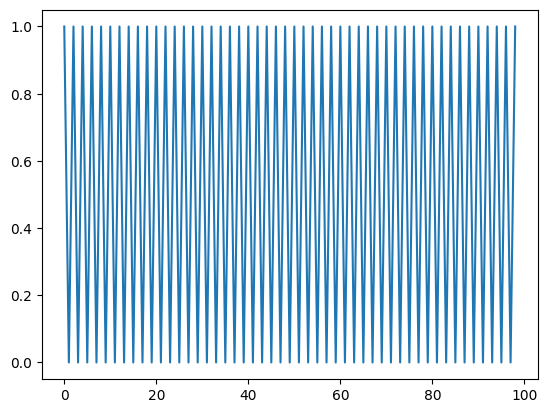

In [10]:
# plt.plot(np.arange(99), [tau_store[k][change_node,0] for k in tau_store])
# # 
# plt.plot(np.arange(99), [lam_store[k][0,0] for k in lam_store])
# plt.plot(np.arange(99), [lam_store[k][1,0] for k in lam_store])
# plt.plot(np.arange(99), [lam_store[k][1,1] for k in lam_store])
# plt.plot(np.arange(99), [lam_store[k][0,1] for k in lam_store])

In [6]:
lam_store

{0: array([[2.03324384, 5.23622721],
        [1.02234623, 9.94377896]]),
 1: array([[0.92485652, 2.49124525],
        [0.50222003, 5.00802976]]),
 2: array([[0.58951066, 1.57298136],
        [0.31119987, 3.36426105]]),
 3: array([[0.4668054 , 1.20408909],
        [0.23088407, 2.47367392]]),
 4: array([[0.42187505, 0.91172894],
        [0.19752056, 1.93726248]]),
 5: array([[0.3221212 , 0.83988226],
        [0.18128083, 1.63549114]]),
 6: array([[0.25933765, 0.68296199],
        [0.13141951, 1.40981882]]),
 7: array([[0.24383798, 0.62221934],
        [0.1133842 , 1.22589813]]),
 8: array([[0.20778376, 0.53662539],
        [0.12095389, 1.11241346]]),
 9: array([[0.19402511, 0.51478763],
        [0.09648795, 1.00392968]]),
 10: array([[0.18269501, 0.44955804],
        [0.09123958, 0.89256468]]),
 11: array([[0.1709841 , 0.42508052],
        [0.08839034, 0.85391933]]),
 12: array([[0.15149686, 0.36874448],
        [0.08158428, 0.78146808]]),
 13: array([[0.14245118, 0.35854774],
        [0

In [6]:
tau_k = np.array([1,2,3,4,5])
tau_m = np.array([6,7,8,9,10])
I = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

tau_k.reshape((5,1)) * tau_m.reshape((1,5))

array([[ 6,  7,  8,  9, 10],
       [12, 14, 16, 18, 20],
       [18, 21, 24, 27, 30],
       [24, 28, 32, 36, 40],
       [30, 35, 40, 45, 50]])

In [9]:
np.sum(tau_k.reshape((5,1)) * tau_m.reshape((1,5)))

600

In [31]:
import numpy as np

# Create a sample array of shape (N,)
array_N = np.array([1, 2, 3, 4])  # Replace this with your own array

# Create a sample NxN matrix
N = len(array_N)  # You can also specify the size N directly
matrix_NxN = np.random.rand(N, N)  # Replace this with your own matrix

# Compute the dot product with each row of the matrix
dot_products = np.sum(array_N * matrix_NxN, axis=1)

print(dot_products)


[4.62645271 7.11193236 3.69052261 2.14508471]


In [32]:
matrix_NxN

array([[0.76945121, 0.43962071, 0.51009186, 0.36187112],
       [0.76651095, 0.65514668, 0.51708846, 0.87096566],
       [0.15965931, 0.84008961, 0.60500524, 0.00891709],
       [0.24144094, 0.36835851, 0.19901013, 0.14247409]])

In [33]:
matrix_NxN[0,0] + 2*matrix_NxN[0,1] + 3*matrix_NxN[0,2] + 4*matrix_NxN[0,3]

4.6264527096422885

In [34]:
# Create tau array
random_array = np.abs(np.random.rand(10, 3))
tau = random_array / np.sum(random_array, axis=0)

# Create N array
N = np.random.randint(low=2, high=10, size=(10, 10))
np.fill_diagonal(N, 0)

# Compute product of tau^T and N
numerator_array = tau.T @ N @ tau
numerator_array


array([[4.43061703, 4.94772362, 5.33650848],
       [4.52431257, 4.79930284, 5.1196858 ],
       [4.54802889, 4.91006347, 4.65811031]])

In [30]:
tau

array([[0.49366117, 0.44771555, 0.44111307, 0.37582613, 0.14572001],
       [0.34317613, 0.20474042, 0.14936913, 0.37109123, 0.59105599],
       [0.16316269, 0.34754403, 0.4095178 , 0.25308264, 0.263224  ]])